In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [555]:
df1=pd.read_csv('medicalcharge.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [556]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [557]:
df1.shape

(1338, 7)

In [558]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [559]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [560]:
df1.notnull().value_counts()

age   sex   bmi   children  smoker  region  charges
True  True  True  True      True    True    True       1338
dtype: int64

In [561]:
df1['sex'].unique()

array(['female', 'male'], dtype=object)

In [562]:
df1['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [563]:
df1['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x24cad7e65b0>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')])

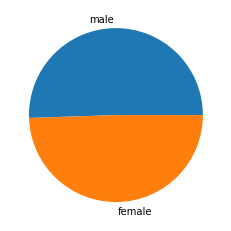

In [564]:
a=['male','female']
plt.pie(df1['sex'].value_counts(),labels=a)

In [565]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [566]:
df1.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

In [570]:
A=pd.get_dummies(df1['smoker'])
A

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [571]:
B=pd.get_dummies(df1['sex'])
B

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


# Dependent Variable

In [33]:
Y=df1['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Independent Variable

In [378]:
X=df1[['age','bmi','children']]
X

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [572]:
X1=pd.concat([X,A,B],axis=1)
X1

,age,bmi,children,no,yes,female,male
0,19,27.900,0,0,1,1,0
1,18,33.770,1,1,0,0,1
2,28,33.000,3,1,0,0,1
3,33,22.705,0,1,0,0,1
4,32,28.880,0,1,0,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,1
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [573]:
X1.dtypes

age           int64
bmi         float64
children      int64
no            uint8
yes           uint8
female        uint8
male          uint8
dtype: object

In [574]:
X1.corr()

,age,bmi,children,no,yes,female,male
age,1.000000,0.109272,0.042469,0.025019,-0.025019,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,-0.003750,0.003750,-0.046371,0.046371
children,0.042469,0.012759,1.000000,-0.007673,0.007673,-0.017163,0.017163
no,0.025019,-0.003750,-0.007673,1.000000,-1.000000,0.076185,-0.076185
yes,-0.025019,0.003750,0.007673,-1.000000,1.000000,-0.076185,0.076185
female,0.020856,-0.046371,-0.017163,0.076185,-0.076185,1.000000,-1.000000
male,-0.020856,0.046371,0.017163,-0.076185,0.076185,-1.000000,1.000000


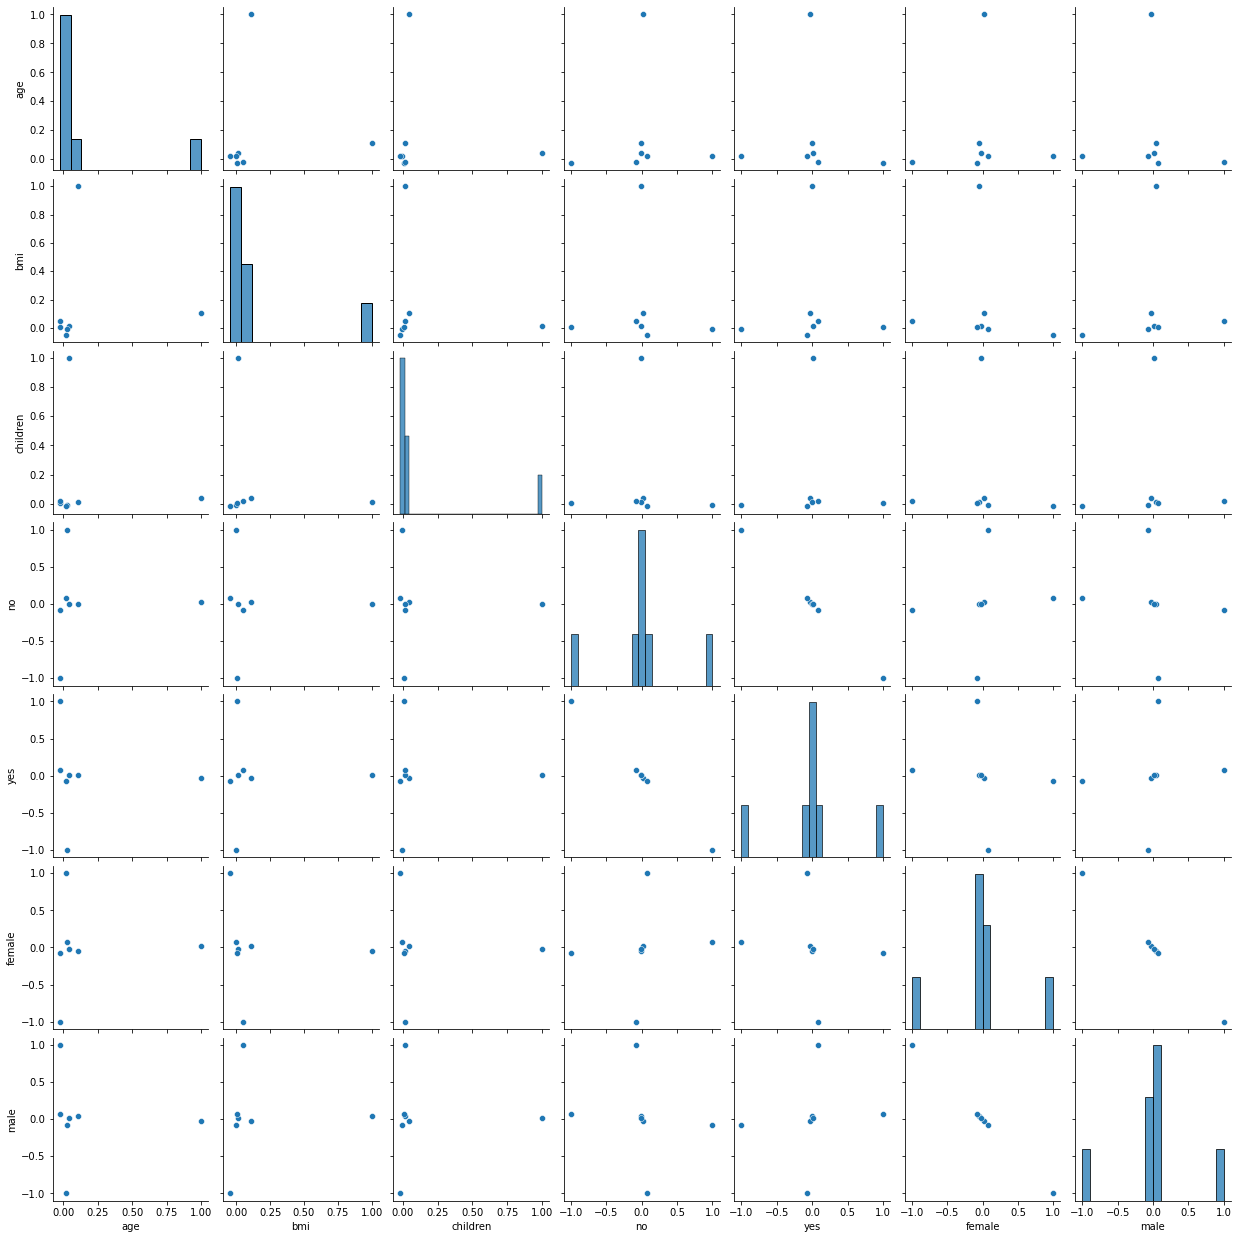

In [575]:
sns.pairplot(X1.corr())

<AxesSubplot:>

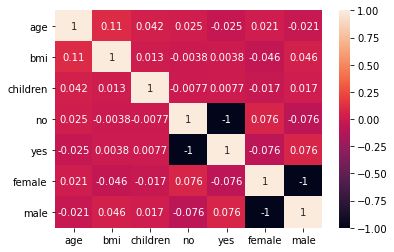

In [576]:
sns.heatmap(X1.corr(),annot=True)

In [577]:
X1.describe()

,age,bmi,children,no,yes,female,male
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.795217,0.204783,0.494768,0.505232
std,14.049960,6.098187,1.205493,0.403694,0.403694,0.500160,0.500160
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,1.000000,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split

In [578]:
from sklearn.model_selection import train_test_split

In [642]:
X1_train,X1_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.20,random_state=40)

In [643]:
X1_train.head()

,age,bmi,children,no,yes,female,male
737,26,23.70,2,1,0,0,1
369,18,30.40,3,1,0,0,1
284,52,31.20,0,1,0,1,0
1302,25,20.80,1,1,0,1,0
958,43,34.96,1,0,1,0,1


In [644]:
Y_train.head()

737      3484.3310
369      3481.8680
284      9625.9200
1302     3208.7870
958     41034.2214
Name: charges, dtype: float64

In [645]:
X1_test.head()

,age,bmi,children,no,yes,female,male
1099,25,33.99,1,1,0,1,0
759,18,38.17,0,0,1,0,1
215,41,37.10,2,1,0,1,0
903,49,36.85,0,1,0,0,1
989,24,20.52,0,0,1,1,0


In [646]:
X1_test.count()

age         268
bmi         268
children    268
no          268
yes         268
female      268
male        268
dtype: int64

In [647]:
X1_train.shape

(1070, 7)

In [648]:
Y_train.shape

(1070,)

# Linear Regression Least Square Method

In [649]:
from sklearn.linear_model import LinearRegression

In [650]:
lr=LinearRegression()

In [651]:
lr.fit(X1_train,Y_train)

LinearRegression()

In [652]:
testprice=lr.predict(X1_test)
testprice

array([ 5.78995213e+03,  2.84015620e+04,  1.14346119e+04,  1.21495903e+04,
        2.44560773e+04,  6.92782243e+03,  1.41103814e+04,  3.00520181e+04,
        1.21249332e+04,  3.16306201e+04,  3.34149146e+04,  1.20199613e+04,
        1.39729036e+04,  1.09389921e+04,  1.30439325e+04,  6.70315855e+03,
        6.57389389e+03,  3.83005033e+04,  3.52023989e+04,  7.80846179e+03,
        1.25347732e+04,  2.27157353e+03,  5.92901103e+03,  3.26380742e+04,
        1.41197948e+04,  2.55679977e+04,  1.43773066e+04,  2.11691511e+03,
        7.14902264e+03,  9.28188625e+03,  3.03132946e+04,  9.08417324e+03,
        3.16405732e+04,  3.62396758e+04,  2.31611650e+04,  6.12781116e+02,
        1.42762289e+04,  1.05924301e+04,  9.60622743e+03,  1.67107291e+04,
        8.05642111e+03,  1.29879875e+04,  8.50127795e+03,  7.52683591e+03,
        1.38791730e+03,  9.78349459e+03,  3.31302551e+03,  2.76477116e+04,
        6.25537764e+03,  1.00568781e+04,  1.43457490e+04,  2.54817311e+04,
        8.59658503e+03,  

In [653]:
pd.DataFrame({'Original Price':Y_test,'Predicted Price':testprice1})

,Original Price,Predicted Price
1099,3227.12110,30749.269857
759,36307.79830,4768.166655
215,7371.77200,4551.630870
903,8125.78450,23027.250023
989,14571.89080,10698.128901
...,...,...
408,6652.52880,9252.580038
466,13224.69300,12507.313217
724,10106.13425,4806.365656
693,2352.96845,10093.893536


# Evaluation Least Square Method

In [654]:
lr.score(X1_test,Y_test)

0.7318775053160517

In [655]:
lr.score(X1_train,Y_train)

0.7541110398362936

# Linear Regression Using Gradient Descent

In [656]:
from sklearn.linear_model import SGDRegressor

In [657]:
sgd=SGDRegressor(max_iter=10000,eta0=0.001)

In [658]:
sgd.fit(X1_train,Y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [659]:
testprice1=sgd.predict(X1_test)
testprice1

array([ 8234.99714504, 27354.56551036, 14398.65063541, 15679.52092221,
       22768.96450971,  9567.75596774, 17406.35748612, 29282.46753589,
       15571.9980489 , 30941.23350838, 32535.49247499, 15334.15151086,
       17738.81249474, 14378.84189449, 16212.97457213,  9570.61195024,
        9567.19791625, 37777.62233826, 34817.51988122, 10646.59633184,
       15720.75223281,  4457.87746236,  8861.31669129, 32011.0771691 ,
       17381.9517879 , 24250.0679956 , 17653.18128418,  4628.65302103,
       10137.5900208 , 12630.45346529, 29139.04766887, 11915.20752318,
       30637.31690651, 35724.87263549, 21694.29747402,  2638.52061039,
       17615.56613757, 13445.08906219, 12925.46412987, 20557.37608477,
       10814.43890818, 16575.76314023, 11563.61735447, 10154.94594397,
        3503.42094314, 13001.4707286 ,  5582.77264574, 26602.54720558,
        9114.61263584, 13053.6522943 , 18097.62863546, 24214.6212762 ,
       11793.43913498, 14691.28893511, 11782.30376096,  3260.03054793,
      

In [660]:
pd.DataFrame({'Original Price':Y_test,'Predicted Price':testprice1})

,Original Price,Predicted Price
1099,3227.12110,8234.997145
759,36307.79830,27354.565510
215,7371.77200,14398.650635
903,8125.78450,15679.520922
989,14571.89080,22768.964510
...,...,...
408,6652.52880,8949.021976
466,13224.69300,16326.121755
724,10106.13425,12945.234475
693,2352.96845,4114.240520


# Evaluation Of Gradient Descent

In [661]:
sgd.score(X1_test,Y_test)

0.6876004321425115

In [662]:
sgd.score(X1_train,Y_train)

0.7046837207926198

# Polynomial Regression

In [663]:
from sklearn.preprocessing import PolynomialFeatures

In [696]:
obj = PolynomialFeatures(2)

In [697]:
X1_train_poly=obj.fit_transform(X1_train)

In [698]:
X1_train_poly

array([[ 1.   , 26.   , 23.7  , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 18.   , 30.4  , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 52.   , 31.2  , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 47.   , 28.215, ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 37.   , 27.74 , ...,  1.   ,  0.   ,  0.   ],
       [ 1.   , 24.   , 23.21 , ...,  1.   ,  0.   ,  0.   ]])

In [699]:
lr_poly=LinearRegression()

In [700]:
lr_poly.fit(X1_train_poly,Y_train)

LinearRegression()

In [701]:
X1_test_poly=obj.transform(X1_test)

In [702]:
lr_poly.predict(X1_test_poly)

array([ 5141.71060078, 37292.06761453,  9298.83095101,  9754.50416907,
       12873.44632294,  8157.51860561, 15297.131817  , 24886.90090227,
       11450.75507827, 22024.35189457, 40854.83175456,  4124.88203969,
       14695.33898617, 10184.59264426, 13064.84889012,  6029.60259163,
        6185.7749374 , 45280.21376763, 28507.95837162,  7417.80030349,
       12940.19780497,  3860.58212735,  7258.77848485, 37196.08988106,
       13349.54719824, 23456.34540188, 12867.81879465,  3232.4613987 ,
        6701.02469763, 10962.05383996, 17303.35499752, 11242.55707874,
       23116.68824596, 37343.86202489, 14259.58612567,  3311.51211462,
       13692.90205175, 10295.71165926,  9420.05874238, 15941.02208236,
        9255.10753395, 12296.35569643,  4979.07128569,  3099.67412369,
        3674.49255977,  9544.40675319,  3894.01260044, 25615.21603686,
        6790.65212857, 10130.11320057, 15355.84018111, 22982.09276787,
        7731.43709252, 11723.57194695,  9545.47416426,  3185.55475808,
      

In [703]:
pd.DataFrame({'original values':Y_test,'predicted values':lr_poly.predict(X1_test_poly)})

,original values,predicted values
1099,3227.12110,5141.710601
759,36307.79830,37292.067615
215,7371.77200,9298.830951
903,8125.78450,9754.504169
989,14571.89080,12873.446323
...,...,...
408,6652.52880,7623.872937
466,13224.69300,15021.835009
724,10106.13425,11213.916159
693,2352.96845,3635.084447


# Evaluation Of Polynomial

In [704]:
lr_poly.score(X1_test_poly,Y_test)

0.8435808508870838

In [705]:
lr_poly.score(X1_train_poly,Y_train)

0.8433081592031709